### Neural Network Regression with California Housing

###### As a learner who wants to go beyond classification, I want to train a neural network on the California Housing dataset to predict median house values, So that I understand how regression models differ from classification ones in terms of architecture, loss, and evaluation metrics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [4]:
#loading the dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
#train split
X_train, X_test, y_train, y_test = train_test_split(df, housing.target, test_size=0.2, random_state=42)
#scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
#building regression model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1))  # No activation function for regression output
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
model.summary()

c:\Users\bbuser\Desktop\DataSience-brain-bytes\DataScience-Brain-Bytes\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 192 (768.00 B)

In [10]:
from tensorflow.keras.optimizers import Adam, SGD

def build_model(activation='relu', optimizer=Adam(learning_rate=0.001)):
	model = Sequential()
	model.add(Dense(64, input_dim=X_train.shape[1], activation=activation))
	model.add(BatchNormalization())
	model.add(Dense(32, activation=activation))
	model.add(BatchNormalization())
	model.add(Dense(1))  # Regression output
	model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
	return model

#train with relu 
model_relu = build_model(activation='relu', optimizer=Adam(learning_rate=0.001))
model_relu_sgd = build_model(activation='relu', optimizer=SGD(learning_rate=0.01, momentum=0.9))    
history_relu = model_relu.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
model_relu.summary()
#train with tanh
model_tanh = build_model(activation='tanh', optimizer=Adam(learning_rate=0.001))
model_tanh_sgd = build_model(activation='tanh', optimizer=SGD(learning_rate=0.01, momentum=0.9))
history_tanh = model_tanh.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
model_tanh.summary()

Epoch 1/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5245 - mae: 0.9159 - val_loss: 0.6262 - val_mae: 0.5782
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4718 - mae: 0.5067 - val_loss: 0.4522 - val_mae: 0.4792
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4201 - mae: 0.4736 - val_loss: 0.4168 - val_mae: 0.4553
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3925 - mae: 0.4551 - val_loss: 0.3744 - val_mae: 0.4362
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3746 - mae: 0.4421 - val_loss: 0.3647 - val_mae: 0.4263
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3598 - mae: 0.4338 - val_loss: 0.3519 - val_mae: 0.4093
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3544 - mae: 0.4307 - val_loss: 0.3887 - val_mae: 0.4546
Epoch 8/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3528 - mae: 0.4287 - val_loss: 0.3596 - val_mae: 0.4235
Epoch 9/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,837 (34.52 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 5,764 (22.52 KB)

Epoch 1/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.4180 - mae: 0.8881 - val_loss: 0.4598 - val_mae: 0.4789
Epoch 2/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4638 - mae: 0.4998 - val_loss: 0.4189 - val_mae: 0.4634
Epoch 3/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4185 - mae: 0.4694 - val_loss: 0.3849 - val_mae: 0.4405
Epoch 4/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3985 - mae: 0.4563 - val_loss: 0.3590 - val_mae: 0.4245
Epoch 5/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3932 - mae: 0.4559 - val_loss: 0.4417 - val_mae: 0.4852
Epoch 6/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3813 - mae: 0.4466 - val_loss: 0.3654 - val_mae: 0.4229
Epoch 7/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3787 - mae: 0.4478 - val_loss: 0.3493 - val_mae: 0.4174
Epoch 8/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3754 - mae: 0.4428 - val_loss: 0.3413 - val_mae: 0.4163
Epoch 9/10
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - lo

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,837 (34.52 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 5,764 (22.52 KB)

ReLU Model - MSE: 0.37903645634651184, MAE: 0.424381822347641
Tanh Model - MSE: 0.3339546024799347, MAE: 0.4117070436477661


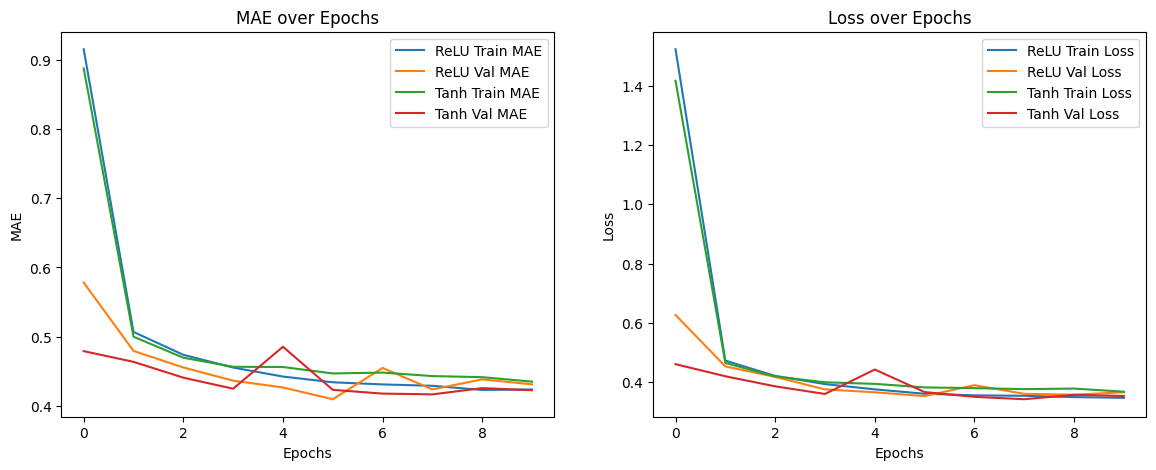

In [11]:
#evaluate both models
mse_relu, mae_relu = model_relu.evaluate(X_test, y_test, verbose=0)
mse_tanh, mae_tanh = model_tanh.evaluate(X_test, y_test, verbose=0)
print(f"ReLU Model - MSE: {mse_relu}, MAE: {mae_relu}")
print(f"Tanh Model - MSE: {mse_tanh}, MAE: {mae_tanh}")
#plot training history
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history_relu.history['mae'], label='ReLU Train MAE')
plt.plot(history_relu.history['val_mae'], label='ReLU Val MAE')
plt.plot(history_tanh.history['mae'], label='Tanh Train MAE')
plt.plot(history_tanh.history['val_mae'], label='Tanh Val MAE')
plt.title('MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_relu.history['loss'], label='ReLU Train Loss')
plt.plot(history_relu.history['val_loss'], label='ReLU Val Loss')
plt.plot(history_tanh.history['loss'], label='Tanh Train Loss')
plt.plot(history_tanh.history['val_loss'], label='Tanh Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Training model with 2 hidden layers...
Layers: 2 | Test MSE: 0.3059 | Test MAE: 0.3809

Training model with 4 hidden layers...
Layers: 4 | Test MSE: 0.2870 | Test MAE: 0.3606

Training model with 6 hidden layers...
Layers: 6 | Test MSE: 0.3061 | Test MAE: 0.3683
Deeper Model - MSE: 0.3566022217273712, MAE: 0.4354532063007355


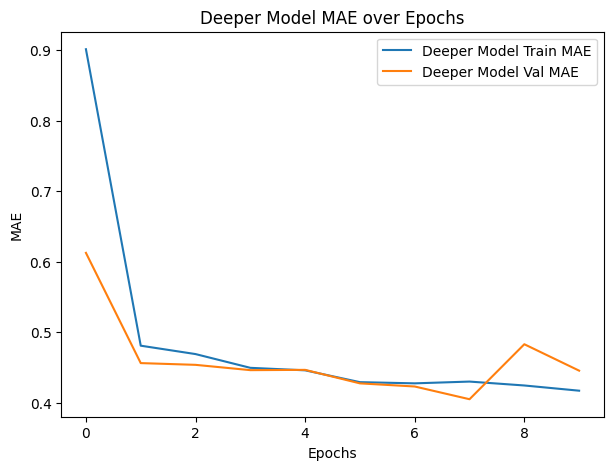

In [18]:
#build deeper model #Function to build model with variable depth
def build_model(num_hidden_layers=2, units=64, activation="relu"):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))  # input layer
    
    # add hidden layers
    for _ in range(num_hidden_layers):
        model.add(layers.Dense(units, activation=activation))
    
    # output layer for regression (linear)
    model.add(layers.Dense(1, activation="linear"))
    
    # compile with MSE loss
    model.compile(optimizer="adam", loss="mse", metrics=["mae", "mse"])
    return model

# 4. Try different depths
for depth in [2, 4, 6]:
    print(f"\nTraining model with {depth} hidden layers...")
    model = build_model(num_hidden_layers=depth, units=64)
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0,
                        validation_data=(X_test, y_test))
    
    # Evaluate
    loss, mae, mse = model.evaluate(X_test, y_test, verbose=0)
    print(f"Layers: {depth} | Test MSE: {mse:.4f} | Test MAE: {mae:.4f}")
#evaluate deeper model
mse_deeper, mae_deeper = deeper_model.evaluate(X_test, y_test, verbose=0)
print(f"Deeper Model - MSE: {mse_deeper}, MAE: {mae_deeper}")